<a href="https://colab.research.google.com/github/cjsdudwls1/simple_things/blob/main/ai%ED%8A%9C%ED%84%B0(%ED%85%8C%EC%8A%A4%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 작업치료사 국가고시 학습 챗봇

## 📌 개요
이 코드는 작업치료사 국가고시 준비를 위한 적응형 학습 챗봇을 구현합니다. 학습자의 정답률에 따라 문제 난이도를 자동으로 조절하고, Gemini AI를 활용해 맞춤형 피드백을 제공합니다.

## 🛠️ 주요 기능 및 로직
1. **지능형 적응형 학습 시스템**: 사용자의 정답률에 따라 문제 난이도를 자동으로 조절합니다. 정답률이 70% 이상이면 난이도를 올리고, 낮으면 내립니다.

2. **벡터 데이터베이스 활용**: FAISS를 사용하여 의료 Q&A 데이터를 효율적으로 저장하고 검색합니다.

3. **Google Gemini API 연동**: 학습자의 답변에 대한 맞춤형 피드백을 생성하기 위해 Gemini 1.5 Pro 모델을 활용합니다.

4. **진행 상황 추적**: 사용자의 학습 진행 상황(정답 수, 오답 수, 현재 난이도)을 실시간으로 추적합니다.

5. **Gradio 기반 직관적 UI**: 답안을 버튼으로 선택할 수 있는 사용자 친화적 인터페이스를 제공합니다.

6. **질문 관리 시스템**: 이미 풀어본 문제를 추적하여 반복을 방지하고, 사용자에게 새로운 문제를 제공합니다.

7. **맞춤형 피드백**: 사용자의 답변에 따라 개념을 설명하고 오답 시 정확한 해설을 제공합니다.

## 📊 기술 스택
- **FAISS**: 벡터 데이터베이스 검색 엔진
- **LangChain**: LLM 프롬프팅 및 인터페이스
- **Gemini API**: 맞춤형 피드백 생성
- **Gradio**: 웹 기반 대화형 UI
- **Google Colab**: 클라우드 개발 환경

## 💡 요약
이 프로젝트는 NLP, 벡터 데이터베이스, 대화형 AI, 적응형 학습 기술을 통합하여 효과적인 개인화 학습 경험을 제공하는 교육용 애플리케이션입니다.

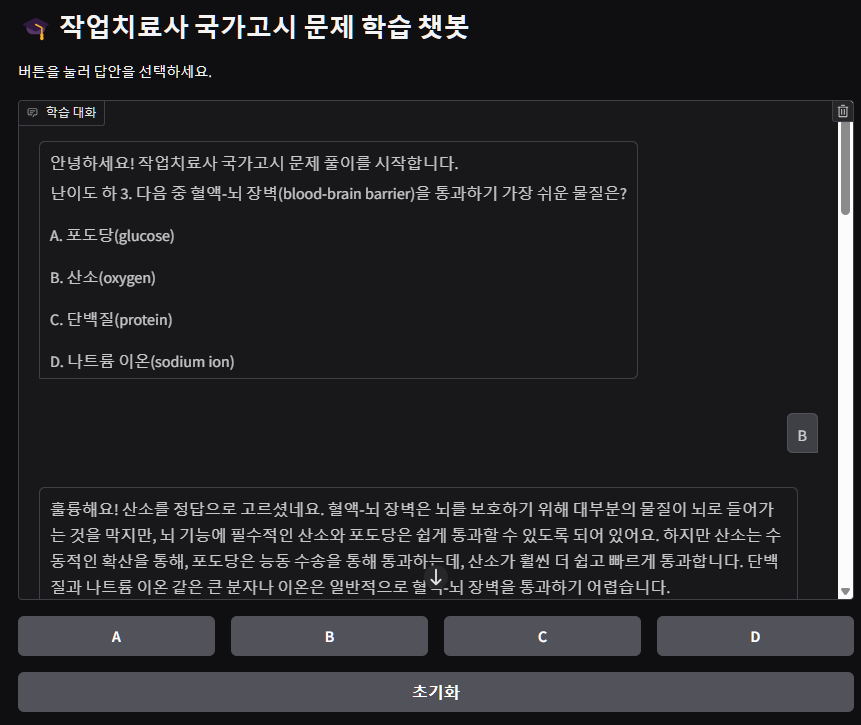

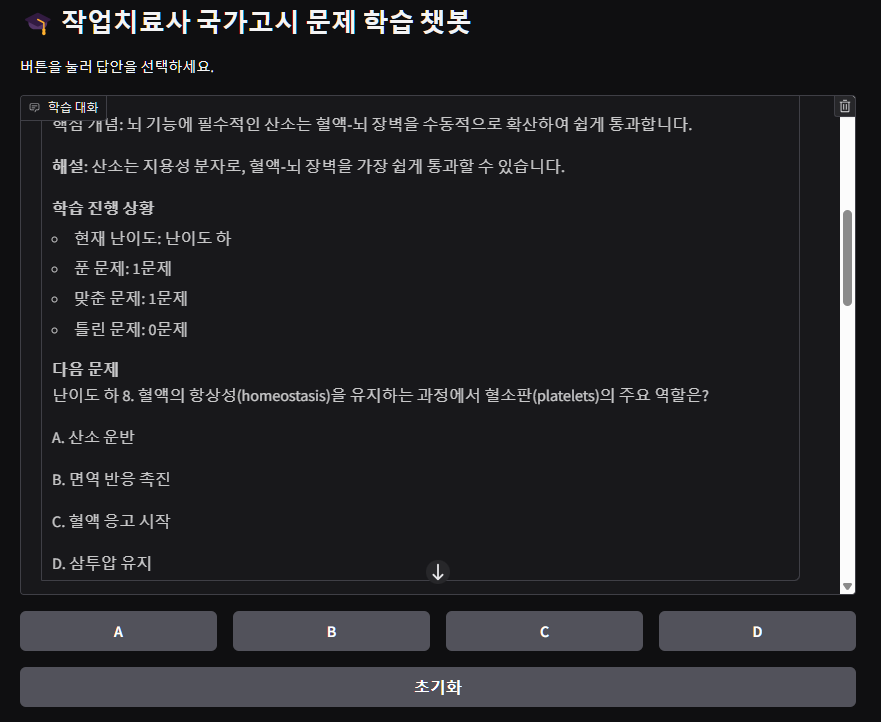

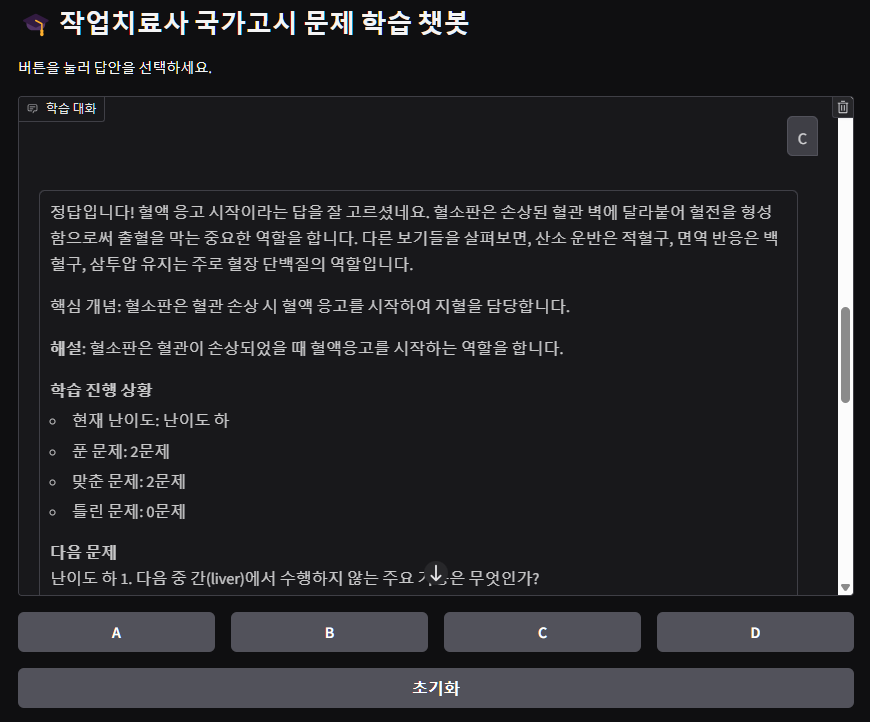

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 패키지 설치 (버전 명시)
!pip install faiss-cpu langchain-text-splitters python-docx unstructured langchain_community llama-index gradio docx2txt -qqq
!pip install --upgrade "google-genai>=1.7.0" "langchain-google-genai>=2.1.3" -qqq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.7/808.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━

# **1단계 : 문서 로드**

In [ ]:
from langchain_community.document_loaders import Docx2txtLoader

loader = Docx2txtLoader("/content/drive/MyDrive/(난이도표시본) 샘플문제 워드로 다시.docx")  # 문서 로더 초기화

docs = loader.load()  # 문서 로딩

print(len(docs))


1


### llm이 못알아 들을 수 있으니 <br>**정규 표현식을 사용하여 '하 N.', '중 N.', '상 N.'을 '난이도 하 N.', '난이도 중 N.', '난이도 상 N.'으로 변환**

In [ ]:
import re

def transform_difficulty_markers(docs):
    for i, doc in enumerate(docs):
        modified_content = re.sub(r'(하|중|상)( \d+\.)', r'난이도 \1\2', doc.page_content)
        docs[i].page_content = modified_content
    return docs

# 변환된 문서 사용
docs = transform_difficulty_markers(docs)
print(docs[0].page_content)

샘플문제 (정답 및 해설 포함)

난이도 하 1. 다음 중 간(liver)에서 수행하지 않는 주요 기능은 무엇인가?

A. 알부민(albumin) 합성

B. 담즙(bile) 생성

C. 혈당 조절(glucose regulation)

D. 인슐린(insulin) 분비

정답: D. 인슐린(insulin) 분비
 해설: 인슐린은 췌장(이자)에서 분비되며, 간은 알부민 합성, 담즙 생성, 혈당 조절을 담당합니다.

난이도 중 2. 근수축(muscle contraction)에 직접적으로 관여하는 단백질 복합체로 옳은 것은?

A. 미오신(myosin)과 트로포닌(troponin)

B. 트로포닌(troponin)과 트로포마이오신(tropomyosin)

C. 액틴(actin)과 콜라겐(collagen)

D. 엘라스틴(elastin)과 미오신(myosin)

정답: B. 트로포닌(troponin)과 트로포마이오신(tropomyosin)
 해설: 트로포닌과 트로포마이오신은 근수축 시 칼슘과 결합하여 액틴-미오신 상호작용을 조절합니다.

난이도 하 3. 다음 중 혈액-뇌 장벽(blood-brain barrier)을 통과하기 가장 쉬운 물질은?

A. 포도당(glucose)

B. 산소(oxygen)

C. 단백질(protein)

D. 나트륨 이온(sodium ion)

정답: B. 산소(oxygen)
 해설: 산소는 지용성 분자로, 혈액-뇌 장벽을 가장 쉽게 통과할 수 있습니다.

난이도 중 4. 신장에서 여과(filtration)가 일어나는 주요 구조물은?

A. 보우만주머니(Bowman's capsule)

B. 근위세뇨관(proximal convoluted tubule)

C. 헨레고리(loop of Henle)

D. 집합관(collecting duct)

정답: A. 보우만주머니(Bowman's capsule)
 해설: 신장에서 혈액의 여과는 사구체와 보우만주머니에서 일어납니다.

난이도 중 5. 다음 중 자율신경계(autonomic nervous syst

# **2단계: 텍스트 분할**

In [ ]:
import re
from langchain_community.document_loaders import UnstructuredWordDocumentLoader

# 2. 청킹을 위한 정규식 패턴 정의
pattern = r'(난이도 하 \d+\.|난이도 중 \d+\.|난이도 상 \d+\.)'

# 3. 커스텀 분할 함수
def question_splitter(text, pattern):
    splits = re.split(pattern, text)
    chunks = []
    for i in range(1, len(splits), 2):
        if i+1 < len(splits):
            chunk = splits[i] + splits[i+1]
            chunks.append(chunk.strip())
    return chunks

# 4. 문서 내용 추출 및 분할
full_text = docs[0].page_content  # 로드된 문서의 전체 텍스트
question_chunks = question_splitter(full_text, pattern)

# 5. 결과 확인
for idx, chunk in enumerate(question_chunks[:3]):  # 상위 3개 샘플 출력
    print(f"=== 문제 {idx+1} ===")
    print(chunk)
    print("\n")


=== 문제 1 ===
난이도 하 1. 다음 중 간(liver)에서 수행하지 않는 주요 기능은 무엇인가?

A. 알부민(albumin) 합성

B. 담즙(bile) 생성

C. 혈당 조절(glucose regulation)

D. 인슐린(insulin) 분비

정답: D. 인슐린(insulin) 분비
 해설: 인슐린은 췌장(이자)에서 분비되며, 간은 알부민 합성, 담즙 생성, 혈당 조절을 담당합니다.


=== 문제 2 ===
난이도 중 2. 근수축(muscle contraction)에 직접적으로 관여하는 단백질 복합체로 옳은 것은?

A. 미오신(myosin)과 트로포닌(troponin)

B. 트로포닌(troponin)과 트로포마이오신(tropomyosin)

C. 액틴(actin)과 콜라겐(collagen)

D. 엘라스틴(elastin)과 미오신(myosin)

정답: B. 트로포닌(troponin)과 트로포마이오신(tropomyosin)
 해설: 트로포닌과 트로포마이오신은 근수축 시 칼슘과 결합하여 액틴-미오신 상호작용을 조절합니다.


=== 문제 3 ===
난이도 하 3. 다음 중 혈액-뇌 장벽(blood-brain barrier)을 통과하기 가장 쉬운 물질은?

A. 포도당(glucose)

B. 산소(oxygen)

C. 단백질(protein)

D. 나트륨 이온(sodium ion)

정답: B. 산소(oxygen)
 해설: 산소는 지용성 분자로, 혈액-뇌 장벽을 가장 쉽게 통과할 수 있습니다.




# **3단계: 임베딩**

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

# 1. 모델과 토크나이저 로드
model_name = 'BM-K/KoSimCSE-roberta'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 2. 임베딩 추출 함수 수정 (문장 수준 임베딩)
def get_embeddings(sentences):
    # 입력: 문장 리스트 (예: ["문장1", "문장2", ...])
    inputs = tokenizer(
        sentences,
        padding=True,
        truncation=True,
        max_length=512,  # 최대 길이 제한
        return_tensors="pt"
    )

    with torch.no_grad():
        outputs = model(**inputs)

    # [CLS] 토큰 임베딩 추출 (첫 번째 토큰)
    # outputs.last_hidden_state.shape = (batch_size, seq_len, hidden_dim)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]

    # 정규화 (선택 사항)
    cls_embeddings = torch.nn.functional.normalize(cls_embeddings, p=2, dim=1)

    return cls_embeddings

# 3. 예시: 청킹된 문제 리스트를 임베딩
embeddings = get_embeddings(question_chunks)  # (num_chunks, 768) 형태 텐서

# 4. 임베딩 결과 확인
print(embeddings.shape)  # → torch.Size([문항개수, 768])


torch.Size([10, 768])


# **4단계: FAISS 벡터 스토어 생성**

In [ ]:
import numpy as np
import faiss
import pickle
import os

# 저장 경로 설정
save_dir = '/content/drive/MyDrive/tutor_store'

# 1. 임베딩을 NumPy 배열로 변환 (KoSimCSE 출력이 PyTorch 텐서라 가정)
embeddings_np = embeddings.numpy().astype('float32')  # (num_chunks, 768)

# 2. FAISS 인덱스 생성 (L2 거리 기준)
dimension = embeddings_np.shape[1]  # 768
faiss_index = faiss.IndexFlatL2(dimension)

# 3. 임베딩을 인덱스에 추가
faiss_index.add(embeddings_np)

# 4. 벡터스토어와 청크 매핑 저장
faiss_path = os.path.join(save_dir, "medical_qa_index.faiss")
chunk_path = os.path.join(save_dir, "chunk_mapping.pkl")

# FAISS 인덱스 저장
faiss.write_index(faiss_index, faiss_path)
print(f"FAISS 인덱스가 {faiss_path}에 저장되었습니다.")

# 청크 리스트 저장 (검색 시 텍스트 복원용)
with open(chunk_path, 'wb') as f:
    pickle.dump(question_chunks, f)
print(f"청크 매핑이 {chunk_path}에 저장되었습니다.")

FAISS 인덱스가 /content/drive/MyDrive/tutor_store/medical_qa_index.faiss에 저장되었습니다.
청크 매핑이 /content/drive/MyDrive/tutor_store/chunk_mapping.pkl에 저장되었습니다.


# 5단계: tutor 시스템 구현 (gemini-1.5-pro)

In [ ]:
import os
import faiss
import numpy as np
import pickle
import re
import gradio as gr
from google.colab import drive, userdata
from typing import List, Optional
from langchain.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI

# 드라이브 마운트 및 Gemini API 키 설정
drive.mount('/content/drive')
os.environ['GOOGLE_API_KEY'] = userdata.get('Gemini_API_KEY')

# 벡터스토어 경로 설정
store_dir = '/content/drive/MyDrive/tutor_store'
faiss_path = os.path.join(store_dir, "medical_qa_index.faiss")
chunk_path = os.path.join(store_dir, "chunk_mapping.pkl")

# 벡터스토어 로드
faiss_index = faiss.read_index(faiss_path)
with open(chunk_path, 'rb') as f:
    question_chunks = pickle.load(f)

# LLM 초기화
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

# 세션 상태 저장 클래스
class SessionState:
    def __init__(self):
        self.current_level = "난이도 하"
        self.correct_count = 0
        self.incorrect_count = 0
        self.current_question = None
        self.current_answer = None
        self.question_ids = set()

    @property
    def total_attempts(self):
        return self.correct_count + self.incorrect_count

    @property
    def success_rate(self):
        return (self.correct_count / self.total_attempts) if self.total_attempts else 0

    def update_stats(self, is_correct: bool):
        if is_correct:
            self.correct_count += 1
            if self.current_level == "난이도 하" and self.success_rate >= 0.7 and self.total_attempts >= 3:
                self.current_level = "난이도 중"
            elif self.current_level == "난이도 중" and self.success_rate >= 0.7 and self.total_attempts >= 3:
                self.current_level = "난이도 상"
        else:
            self.incorrect_count += 1
            if self.current_level == "난이도 상" and self.success_rate < 0.5:
                self.current_level = "난이도 중"
            elif self.current_level == "난이도 중" and self.success_rate < 0.3:
                self.current_level = "난이도 하"

# 텍스트 처리 유틸 함수들
def get_level_from_text(text: str) -> str:
    if text.startswith("난이도 하"): return "난이도 하"
    if text.startswith("난이도 중"): return "난이도 중"
    if text.startswith("난이도 상"): return "난이도 상"
    match = re.match(r'(난이도\s*[하중상])', text)
    return match.group(1) if match else "난이도 하"


def process_question(text: str):
    if "정답:" not in text:
        return text, "", ""
    q_part = text.split("정답:")[0].strip()
    a_full = text.split("정답:")[1].split("\n")[0].strip()
    # 정답이 "D. 인슐린(insulin) 분비" 형태일 때 첫 글자만 추출
    a_part = a_full.split('.')[0].strip() if '.' in a_full else a_full
    exp = text.split("해설:")[1].strip() if "해설:" in text else ""
    return q_part, a_part, exp


def get_questions_by_level(level: str) -> List[str]:
    return [q for q in question_chunks if get_level_from_text(q) == level]


def select_next_question(session: SessionState) -> Optional[str]:
    avail = get_questions_by_level(session.current_level)
    unseen = [q for q in avail if hash(q) not in session.question_ids]
    if unseen:
        sel = np.random.choice(unseen)
        session.question_ids.add(hash(sel))
        return sel
    for lvl in ["난이도 하", "난이도 중", "난이도 상"]:
        if lvl != session.current_level:
            others = [q for q in get_questions_by_level(lvl) if hash(q) not in session.question_ids]
            if others:
                session.current_level = lvl
                sel = np.random.choice(others)
                session.question_ids.add(hash(sel))
                return sel
    session.question_ids.clear()
    return np.random.choice(avail) if avail else None

# LLM 피드백용 프롬프트
feedback_prompt = ChatPromptTemplate.from_template("""
당신은 작업치료사 국가고시 전문가입니다. 다음 정보를 바탕으로 학생에게 유익한 피드백을 제공해주세요:

문제: {question}
학생 답변: {user_answer}
정답: {correct_answer}

{result_prefix}

피드백을 제공할 때:
1. 학생의 이해도를 격려하세요
2. 왜 해당 답변이 맞거나 틀렸는지 간략히 설명하세요
3. 핵심 개념을 한 문장으로 요약하세요
""")

def hide_answer_from_question(text: str) -> str:
    return text.split("정답:")[0].strip() if "정답:" in text else text

# 피드백 생성 함수
def generate_feedback(session: SessionState, user_answer: str, is_correct: bool) -> str:
    try:
        question, _, _ = process_question(session.current_question)
        prompt = feedback_prompt.format(
            question=question,
            user_answer=user_answer,
            correct_answer=session.current_answer,
            result_prefix="정답입니다!" if is_correct else "아쉽게도 오답입니다."
        )
        resp = llm.invoke(prompt)
        fb = resp.content
    except Exception:
        fb = ("정답입니다!" if is_correct else "오답입니다.") + f" 정답은 {session.current_answer}입니다."
    if not is_correct:
        fb += f"\n\n**정답**: {session.current_answer}"
    _, _, exp = process_question(session.current_question)
    if exp:
        fb += f"\n\n**해설**: {exp}"
    return fb

# 다음 문제 준비 함수
def prepare_next_question(session: SessionState) -> str:
    nxt = select_next_question(session)
    if not nxt:
        return "**모든 문제를 풀었습니다! 수고하셨습니다.**"
    q, a, _ = process_question(nxt)
    session.current_question = nxt
    session.current_answer = a
    q_only = hide_answer_from_question(q)
    info = (f"**학습 진행 상황**\n"
            f"- 현재 난이도: {session.current_level}\n"
            f"- 푼 문제: {session.total_attempts}문제\n"
            f"- 맞춘 문제: {session.correct_count}문제\n"
            f"- 틀린 문제: {session.incorrect_count}문제\n\n")
    return info + f"**다음 문제**\n{q_only}"

# 채팅 인터페이스 함수
def chat_interface(message, history, session_state):
    if not message or not message.strip():
        return history, ""
    # 첫 질문
    if not history:
        q_full = select_next_question(session_state)
        if not q_full:
            return [{"role": "assistant", "content": "문제를 불러올 수 없습니다."}], ""
        q, a, _ = process_question(q_full)
        session_state.current_question = q_full
        session_state.current_answer = a
        return [
            {"role": "assistant", "content": "안녕하세요! 작업치료사 국가고시 문제 풀이를 시작합니다."},
            {"role": "assistant", "content": hide_answer_from_question(q)}
        ], ""
    # 답안 처리
    new_hist = history.copy()
    user_ans = message.strip().upper()
    new_hist.append({"role": "user", "content": user_ans})
    correct = (user_ans == session_state.current_answer.upper())
    session_state.update_stats(correct)
    fb = generate_feedback(session_state, user_ans, correct)
    nxt_q = prepare_next_question(session_state)
    new_hist.append({"role": "assistant", "content": fb + "\n\n" + nxt_q})
    return new_hist, ""

# 버튼 클릭 처리 함수
def answer_click(answer, history, session_state):
    new_history, _ = chat_interface(answer, history, session_state)
    return new_history

# 세션 초기화 함수
def clear_chat():
    new_sess = SessionState()
    first = select_next_question(new_sess)
    q, a, _ = process_question(first)
    new_sess.current_question = first
    new_sess.current_answer = a
    return new_sess, [
        {"role": "assistant", "content": "안녕하세요! 작업치료사 국가고시 문제 풀이를 시작합니다."},
        {"role": "assistant", "content": hide_answer_from_question(q)}
    ]

# Gradio UI 구성
with gr.Blocks(css="""
    .gradio-container {max-width: 900px; margin: auto;}
    .chat-history {height: 600px !important;}
    footer {display: none !important;}
""") as demo:
    gr.Markdown("# 🎓 작업치료사 국가고시 문제 학습 챗봇")
    gr.Markdown("버튼을 눌러 답안을 선택하세요.")

    session_state = gr.State(SessionState())
    chatbot = gr.Chatbot(label="학습 대화", height=500, type="messages", render_markdown=True)

    with gr.Row():
        btn_A = gr.Button("A")
        btn_B = gr.Button("B")
        btn_C = gr.Button("C")
        btn_D = gr.Button("D")
        clear_btn = gr.Button("초기화")

    btn_A.click(lambda history, ss: answer_click("A", history, ss), inputs=[chatbot, session_state], outputs=[chatbot])
    btn_B.click(lambda history, ss: answer_click("B", history, ss), inputs=[chatbot, session_state], outputs=[chatbot])
    btn_C.click(lambda history, ss: answer_click("C", history, ss), inputs=[chatbot, session_state], outputs=[chatbot])
    btn_D.click(lambda history, ss: answer_click("D", history, ss), inputs=[chatbot, session_state], outputs=[chatbot])

    clear_btn.click(clear_chat, outputs=[session_state, chatbot])
    demo.load(clear_chat, outputs=[session_state, chatbot])

if __name__ == "__main__":
    demo.launch(share=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59745050e818cf11fa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
